In [4]:
%matplotlib inline
import numpy as np
import sys
sys.path.append('./../../flux/')
from coare3 import coare3
from gravity_constant import grv
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seawater as sw
import cartopy.crs as ccrs                   # import projections
import cartopy.feature as cf                 # import features

fig_dir='C:/Users/gentemann/Google Drive/f_drive/docs/projects/misst-arctic/Saildrone/'

icefile='C:/Users/gentemann/Google Drive/f_drive/docs/projects/misst-arctic/Ice Present.xlsx'

data_dir = '//white_home_pc/F/data/cruise_data/saildrone/2019_arctic/post_mission/'

adir_sbe='//white_home_pc/F/data/cruise_data/saildrone/2019_arctic/sbe56/sd-'

data_dir_sbe_combined = '//white_home_pc/F/data/cruise_data/saildrone/2019_arctic/post_mission_combined/'

data_dir_out = '//white_home_pc/F/data/cruise_data/saildrone/2019_arctic/post_mission_combined_fluxes/'

fnames=['saildrone-gen_5-arctic_misst_2019-sd1036-20190514T230000-20191011T183000-1_minutes-v1.1575336154680-withSBE.nc',
       'saildrone-gen_5-arctic_misst_2019-sd1037-20190514T230000-20191011T183000-1_minutes-v1.1575487464625-withSBE.nc']

fnames_out=['saildrone-gen_5-arctic_misst_2019-sd1036-20190514T230000-20191011T183000-1_minutes-v1.1575336154680-withSBE_fluxes.nc',
       'saildrone-gen_5-arctic_misst_2019-sd1037-20190514T230000-20191011T183000-1_minutes-v1.1575487464625-withSBE_fluxes.nc']

jcool = 1 #ocean bulk temperature


WS_height = 4.5  #saildrone height obs
Ta_height = 2.3
Rs_mean = 312   #from eyeballing 1037 data
Rl_mean = 300  #from eyeballing 1037 data


# Print out min/max to check on units

In [2]:
#    Args:  
#        u (float): relative wind speed (m/s) at height zu(m)
#        t (float): bulk air temperature (degC) at height zt(m)
#        rh (float): relative humidity (#) at height zq(m) [0-100]
#        P (float): surface air pressure (mb) (default = 1015)
#        ts (float): water temperature (degC) see jcool below
#        Rs (float): downward shortwave radiation (W/m^2) (default = 150) 
#        Rl (float): downward longwave radiation (W/m^2) (default = 370)
#        lat (float): latitude (default = +45 N)
#        zi (float): PBL height (m) (default = 600m)

for i in range(2):
    ds = xr.open_dataset(data_dir_sbe_combined+fnames[i])
    
    tem=sw.dens0(ds.SAL_SBE37_MEAN,ds.TEMP_SBE37_MEAN)
    ds['density_MEAN']=xr.DataArray(tem,dims=('time'),coords={'time':ds.time})
    tem=sw.alpha(ds.SAL_SBE37_MEAN,ds.TEMP_SBE37_MEAN,ds.BARO_PRES_MEAN*0) #pressure =0 at surface
    ds['alpha_MEAN']=xr.DataArray(tem,dims=('time'),coords={'time':ds.time})
    tem=sw.beta(ds.SAL_SBE37_MEAN,ds.TEMP_SBE37_MEAN,ds.BARO_PRES_MEAN*0) #pressure =0 at surface
    ds['beta_MEAN']=xr.DataArray(tem,dims=('time'),coords={'time':ds.time})
    
    #calcalate 10 m wind
    WS_height = 5.2  #saildrone height obs
    Ta_height = 2.4
    Rs_mean = 312   #from eyeballing 1037 data
    Rl_mean = 300  #from eyeballing 1037 data
    
    tem = ds #.isel(trajectory=i)   
    cond = (np.isfinite(tem.wspd_MEAN) & np.isfinite(tem.TEMP_AIR_MEAN) \
            & np.isfinite(tem.RH_MEAN) & np.isfinite(tem.BARO_PRES_MEAN) \
            & np.isfinite(tem.sea_water_temperature_00_mean) \
            & np.isfinite(tem.lat))                                                                            
    ds2=tem.where(cond,drop=True)
    print(ds2.dims)
    
    print(ds2.RH_MEAN.min().data,ds2.RH_MEAN.max().data)
    print(ds2.BARO_PRES_MEAN.min().data,ds2.BARO_PRES_MEAN.max().data)
    print(ds2.TEMP_AIR_MEAN.attrs)
    print(ds2.TEMP_AIR_MEAN.min().data)
    print(ds2.TEMP_AIR_MEAN.max().data)
    print(ds2.sea_water_temperature_00_mean.attrs)
    print(ds2.sea_water_temperature_00_mean.min().data)
    print(ds2.sea_water_temperature_00_mean.max().data)
    print(ds2.UWND_MEAN.attrs)
 

Frozen(SortedKeysDict({'time': 125718}))
54.59 100.0
652.12 1029.46
{'standard_name': 'air_temperature', 'long_name': 'Air temperature', 'units': 'degrees_c', 'installed_date': '2019-04-10T01:04:22.555277Z', 'device_name': 'Rotronic AT/RH (0020208914)', 'serial_number': '0020208914', 'last_calibrated': '2017-05-10', 'installed_height': 2.3, 'vendor_name': 'Rotronic', 'model_name': 'HC2-S3', 'nominal_sampling_schedule': '60s on, 240s off, centered at :00', 'update_period': 1000}
-2.76
12.41
{'long_name': 'sea surface depth 1-min mean', 'standard_name': 'sea_water_temperature', 'installed_height': '-0.33 m', 'serial_number': 'SBE05609153', 'model_number': '56', 'sensor_description': 'Seabird 56 Temperature Logger', 'model_name': 'SBE 56', 'product_page': 'http://www.seabird.com/sbe56-temperature-logger', 'nominal_sampling_schedule': '1 minute averages from :54 to :06 seconds', 'units': 'degrees_C', 'valid_min': -10.0, 'valid_max': 50.0}
-1.1542999999999999
11.359699999999998
{'standard_n

In [3]:

jcool = 1 #ocean bulk temperature


for i in range(2):
    ds = xr.open_dataset(data_dir_sbe_combined+fnames[i])
    
    tem=sw.dens0(ds.SAL_SBE37_MEAN,ds.TEMP_SBE37_MEAN)
    ds['density_MEAN']=xr.DataArray(tem,dims=('time'),coords={'time':ds.time})
    tem=sw.alpha(ds.SAL_SBE37_MEAN,ds.TEMP_SBE37_MEAN,ds.BARO_PRES_MEAN*0) #pressure =0 at surface
    ds['alpha_MEAN']=xr.DataArray(tem,dims=('time'),coords={'time':ds.time})
    tem=sw.beta(ds.SAL_SBE37_MEAN,ds.TEMP_SBE37_MEAN,ds.BARO_PRES_MEAN*0) #pressure =0 at surface
    ds['beta_MEAN']=xr.DataArray(tem,dims=('time'),coords={'time':ds.time})
    
    tem = ds #.isel(trajectory=i)   
    cond = (np.isfinite(tem.wspd_MEAN) & np.isfinite(tem.TEMP_AIR_MEAN) \
            & np.isfinite(tem.RH_MEAN) & np.isfinite(tem.BARO_PRES_MEAN) \
            & np.isfinite(tem.sea_water_temperature_00_mean) \
            & np.isfinite(tem.lat))                                                                            
    ds2=tem.where(cond,drop=True)
    print(ds2.dims)
      
    
    inputs = {'u':ds2.wspd_MEAN,
              't':ds2.TEMP_AIR_MEAN,
              'rh':ds2.RH_MEAN,
              'P':ds2.BARO_PRES_MEAN,
              'ts':ds2.sea_water_temperature_00_mean,
              'lat':ds2.lat,
             'zt':Ta_height,
             'zu':WS_height,
             'Rl':Rl_mean,
             'Rs':Rs_mean,
             'jcool':jcool}
    res = coare4(inputs)
    ds['sensible_heat_flux_v4']=xr.DataArray(res['hsb'][0,:].data,coords=[ds2.time],dims=['time'],
                                           attrs={'long_name':'sensible heat flux into ocean','units':'W/m^2'})
    ds['latent_heat_flux_v4']=xr.DataArray(res['hlb'][0,:].data,coords=[ds2.time],dims=['time'],
                                           attrs={'long_name':'latent heat flux into ocean','units':'W/m^2'})
    ds['cool_skin_v4']=xr.DataArray(res['dter'][0,:].data,coords=[ds2.time],dims=['time'],
                                           attrs={'long_name':'cool-skin temperature depression','units':'degC'})
    ds['skin_thickness_v4']=xr.DataArray(res['tkt'][0,:].data,coords=[ds2.time],dims=['time'],
                                           attrs={'long_name':'cool-skin thickness','units':'m'})
    res = coare3(inputs)
    ds['sensible_heat_flux_v3']=xr.DataArray(res['hsb'][0,:].data,coords=[ds2.time],dims=['time'],
                                           attrs={'long_name':'sensible heat flux into ocean','units':'W/m^2'})
    ds['latent_heat_flux_v3']=xr.DataArray(res['hlb'][0,:].data,coords=[ds2.time],dims=['time'],
                                           attrs={'long_name':'latent heat flux into ocean','units':'W/m^2'})
    ds['cool_skin_v3']=xr.DataArray(res['dter'][0,:].data,coords=[ds2.time],dims=['time'],
                                           attrs={'long_name':'cool-skin temperature depression','units':'degC'})
    ds['skin_thickness_v3']=xr.DataArray(res['tkt'][0,:].data,coords=[ds2.time],dims=['time'],
                                           attrs={'long_name':'cool-skin thickness','units':'m'})
    ds.to_netcdf(data_dir_out+fnames_out[i])

Frozen(SortedKeysDict({'time': 125718}))
t (1, 125718)
lat (1, 125718)
Frozen(SortedKeysDict({'time': 133952}))
t (1, 133952)
lat (1, 133952)


In [13]:
fnames=['saildrone-gen_5-arctic_misst_2019-sd1036-20190514T230000-20191011T183000-1_minutes-v1.1575336154680-withSBE_fluxes.nc',
       'saildrone-gen_5-arctic_misst_2019-sd1037-20190514T230000-20191011T183000-1_minutes-v1.1575487464625-withSBE_fluxes.nc']
ds = xr.open_dataset(data_dir_out+fnames[0])
ds

<xarray.Dataset>
Dimensions:                         (time: 215731)
Coordinates:
  * time                            (time) datetime64[ns] 2019-05-14T23:00:00 ... 2019-10-11T18:30:00
    lat                             (time) float64 ...
    lon                             (time) float64 ...
    trajectory                      object ...
Data variables:
    SOG                             (time) float64 ...
    SOG_FILTERED_MEAN               (time) float64 ...
    SOG_FILTERED_STDDEV             (time) float64 ...
    SOG_FILTERED_MAX                (time) float64 ...
    SOG_FILTERED_MIN                (time) float64 ...
    COG                             (time) float64 ...
    COG_FILTERED_MEAN               (time) float64 ...
    COG_FILTERED_STDDEV             (time) float64 ...
    HDG                             (time) float64 ...
    HDG_FILTERED_MEAN               (time) float64 ...
    HDG_FILTERED_STDDEV             (time) float64 ...
    ROLL_FILTERED_MEAN              (time) float64 ...
    ROLL_FILTERED_STDDEV            (time) float64 ...
    ROLL_FILTERED_PEAK              (time) float64 ...
    PITCH_FILTERED_MEAN             (time) float64 ...
    PITCH_FILTERED_STDDEV           (time) float64 ...
    PITCH_FILTERED_PEAK             (time) float64 ...
    HDG_WING                        (time) float64 ...
    WING_HDG_FILTERED_MEAN          (time) float64 ...
    WING_HDG_FILTERED_STDDEV        (time) float64 ...
    WING_ROLL_FILTERED_MEAN         (time) float64 ...
    WING_ROLL_FILTERED_STDDEV       (time) float64 ...
    WING_ROLL_FILTERED_PEAK         (time) float64 ...
    WING_PITCH_FILTERED_MEAN        (time) float64 ...
    WING_PITCH_FILTERED_STDDEV      (time) float64 ...
    WING_PITCH_FILTERED_PEAK        (time) float64 ...
    WING_ANGLE                      (time) float64 ...
    UWND_MEAN                       (time) float64 ...
    UWND_STDDEV                     (time) float64 ...
    VWND_MEAN                       (time) float64 ...
    VWND_STDDEV                     (time) float64 ...
    WWND_MEAN                       (time) float64 ...
    WWND_STDDEV                     (time) float64 ...
    GUST_WND_MEAN                   (time) float64 ...
    GUST_WND_STDDEV                 (time) float64 ...
    WIND_HEIGHT_MEAN                (time) float64 ...
    WIND_HEIGHT_STDDEV              (time) float64 ...
    TEMP_AIR_MEAN                   (time) float64 ...
    TEMP_AIR_STDDEV                 (time) float64 ...
    RH_MEAN                         (time) float64 ...
    RH_STDDEV                       (time) float64 ...
    BARO_PRES_MEAN                  (time) float64 ...
    BARO_PRES_STDDEV                (time) float64 ...
    PAR_AIR_MEAN                    (time) float64 ...
    PAR_AIR_STDDEV                  (time) float64 ...
    TEMP_IR_SKY_HULL_MEAN           (time) float64 ...
    TEMP_IR_SKY_HULL_STDDEV         (time) float64 ...
    TEMP_IR_SEA_HULL_UNCOMP_MEAN    (time) float64 ...
    TEMP_IR_SEA_HULL_UNCOMP_STDDEV  (time) float64 ...
    TEMP_IR_SEA_WING_UNCOMP_MEAN    (time) float64 ...
    TEMP_IR_SEA_WING_UNCOMP_STDDEV  (time) float64 ...
    WAVE_DOMINANT_PERIOD            (time) float64 ...
    WAVE_SIGNIFICANT_HEIGHT         (time) float64 ...
    TEMP_SBE37_MEAN                 (time) float64 ...
    TEMP_SBE37_STDDEV               (time) float64 ...
    SAL_SBE37_MEAN                  (time) float64 ...
    SAL_SBE37_STDDEV                (time) float64 ...
    COND_SBE37_MEAN                 (time) float64 ...
    COND_SBE37_STDDEV               (time) float64 ...
    TEMP_CTD_RBR_MEAN               (time) float64 ...
    TEMP_CTD_RBR_STDDEV             (time) float64 ...
    SAL_RBR_MEAN                    (time) float64 ...
    SAL_RBR_STDDEV                  (time) float64 ...
    COND_RBR_MEAN                   (time) float64 ...
    COND_RBR_STDDEV                 (time) float64 ...
    O2_CONC_SBE37_MEAN              (time) float64 ...
    O2_CONC_SB

In [14]:
ds.cool_skin_v3.mean().data,ds.cool_skin_v3.min().data,ds.cool_skin_v3.max().data

(array(0.14798114), array(-0.6024036), array(0.30129428))

C:\Users\gentemann\Miniconda3\envs\satenv\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\gentemann\Miniconda3\envs\satenv\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([2.0000e+00, 1.7000e+01, 8.2000e+01, 2.0000e+01, 1.9000e+01,
        6.8000e+01, 2.5700e+02, 3.5590e+04, 7.6980e+04, 1.2683e+04]),
 array([-0.6024036 , -0.51203381, -0.42166403, -0.33129424, -0.24092445,
        -0.15055466, -0.06018487,  0.03018491,  0.1205547 ,  0.21092449,
         0.30129428]),
 <a list of 10 Patch objects>)

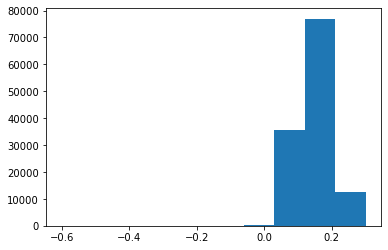

In [18]:
plt.hist(ds.cool_skin_v3)
